First, prepare parameters and load the tx data

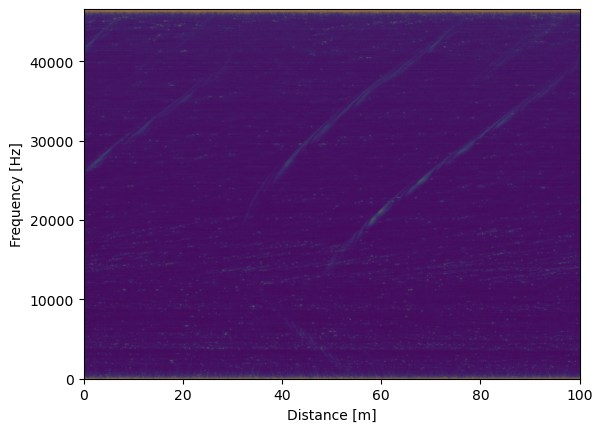

In [2]:
# Verify labels work using matplotlib
import data_io as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sp
import os
from IPython.display import display

label_file = r'/home/Eric/Documents/gitRepos/cv4e_dataPrep/fx_labels_Bp.csv'
data_path = r'/mnt/class_data/esnyder/raw_data'
labels = pd.read_csv(label_file)

# Pick a random label row
row = labels.iloc[np.random.randint(0, len(labels))]
data_filepath = os.path.join(data_path, row['dataset'], row['source_file'])

# Find all labels in same dataset & time
same_labels = labels[
    (labels['source_file'] == row['source_file']) &
    (labels['t'] == row['t'])
]

# load settings and data
settings_file = io.find_settings_h5(data_filepath)
settings = io.load_settings_preprocessed_h5(settings_file)
nonzeros = settings['rehydration_info']['nonzeros_mask']
original_shape = settings['rehydration_info']['target_shape']
dx = settings['processing_settings']['dx']
fs = settings['processing_settings']['fs']
fk_dehyd, timestamp = io.load_preprocessed_h5(data_filepath)

# Rehydrate
tx = 1e9 * io.rehydrate(fk_dehyd, nonzeros, original_shape, return_format='tx')

# define axes extents:
x_extent = tx.shape[0]*dx
f_extent = fs/2

fig = plt.figure()
# extent = [x_min, x_max, y_min, y_max] for imshow
extent = [0, f_extent, 0, x_extent]
plt.imshow(tx, aspect='auto', extent=extent, origin='lower', vmin = 0, vmax=.4)
plt.xlabel('Distance [m]')
plt.ylabel('Frequency [Hz]')
plt.show()

Next, plot fx plot

In [ ]:
idx_start = int(row['t']*fs)
idx_end = int((row['t'] + 2)*fs-1)

tx_seg = tx[idx_start:idx_end, :]
fx_fullCable = np.abs(np.fft.rfft(tx_seg, axis=1))
# Plot full cable FX image
fig = plt.figure()
plt.imshow(fx_fullCable, aspect='equal', origin='lower', vmin=0, vmax=30, 
           extent=[0, fs/2, 0, x_extent])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Distance [m]')
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method